<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


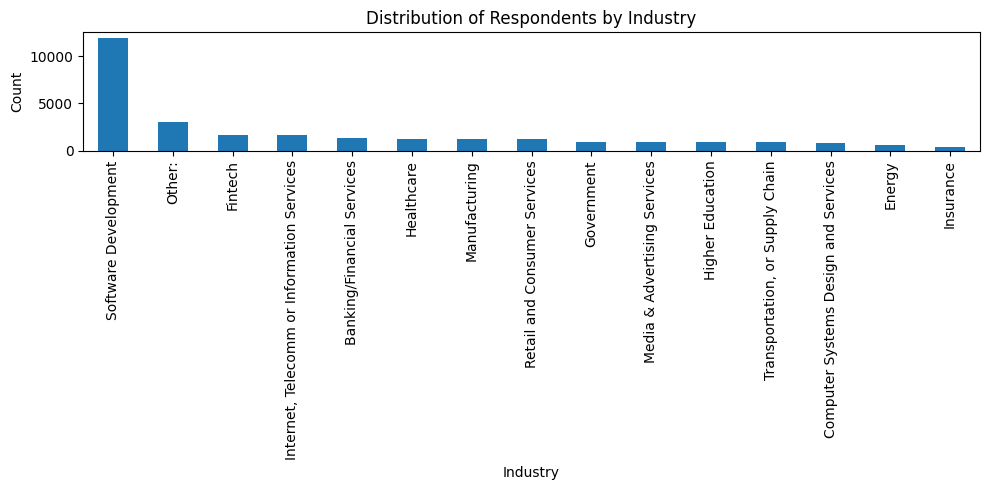

In [3]:
##Write your code here
industry_counts = df["Industry"].dropna().value_counts()
industry_counts.plot(kind='bar', figsize=(10, 5))
plt.title("Distribution of Respondents by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [11]:
##Write your code here
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors='coerce')
print("Mean: {}".format(df["ConvertedCompYearly"].mean()))
print("Median: {}".format(df["ConvertedCompYearly"].median()))
print("Standard Deviation: {}".format(df["ConvertedCompYearly"].std()))

threshold = df["ConvertedCompYearly"].mean() + 3 * df["ConvertedCompYearly"].std()

print("Threshold: {}".format(threshold))
print("Count Exceeding Threshold: {}".format(len(df[df["ConvertedCompYearly"] > threshold])))

Mean: 86155.28726264134
Median: 65000.0
Standard Deviation: 186756.97308629757
Threshold: 646426.2065215341
Count Exceeding Threshold: 89


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: $32712.0

Q3: $107971.5

IQR: $75259.5

Lower bound: $0

Upper bound: $220860.75

Number of outliers: 978

Percentage of outliers: 1.4945672937329033%


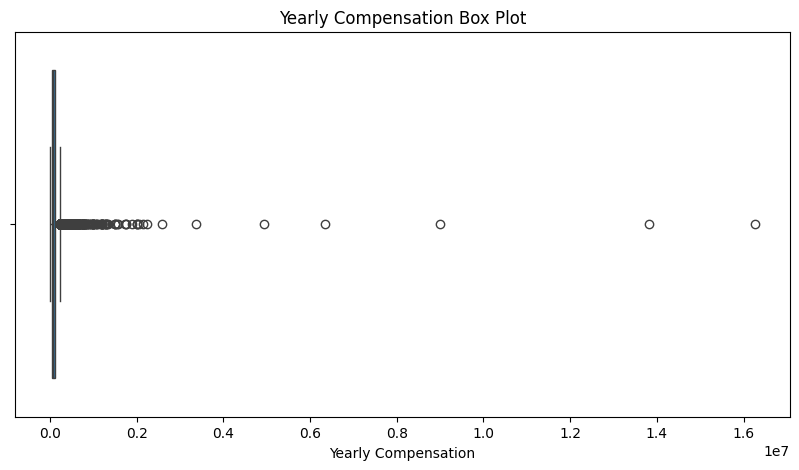

In [9]:
##Write your code here
q1 = df["ConvertedCompYearly"].quantile(0.25)
q3 = df["ConvertedCompYearly"].quantile(0.75)
iqr = q3 - q1
lower = max(0, q1 - 1.5 * iqr)
upper = q3 + 1.5 * iqr
outliers = df[(df["ConvertedCompYearly"] < lower) | (df["ConvertedCompYearly"] > upper)]

print("Q1: ${}".format(q1))
print("\nQ3: ${}".format(q3))
print("\nIQR: ${}".format(iqr))
print("\nLower bound: ${}".format(lower))
print("\nUpper bound: ${}".format(upper))
print("\nNumber of outliers: {}".format(len(outliers)))
print("\nPercentage of outliers: {}%".format((len(outliers) / len(df)) * 100))

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["ConvertedCompYearly"])
plt.title("Yearly Compensation Box Plot")
plt.xlabel("Yearly Compensation")
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [13]:
##Write your code here
df["ConvertedCompYearly"] = df["ConvertedCompYearly"].fillna(df["ConvertedCompYearly"].mean())
df_no_outliers = df[(df["ConvertedCompYearly"] > lower) & (df["ConvertedCompYearly"] < upper)]

print(f"Original DataFrame size: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"No Outlier DataFrame size: {df_no_outliers.shape[0]} rows, {df_no_outliers.shape[1]} columns")
print(f"Outliers Removed: {df.shape[0] - df_no_outliers.shape[0]}")

Original DataFrame size: 65437 rows, 114 columns
No Outlier DataFrame size: 64459 rows, 114 columns
Outliers Removed: 978


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [17]:
##Write your code here
!pip install numpy
import numpy as np

df.replace('Prefer not to say', np.nan, inplace = True)
df.dropna()
age_map= {
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "18-24 years old": (18+24)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "Under 18 years old": 18,
    "65 years or older": 65
}
df["Averaged_Age"] = df["Age"].map(age_map)

print("Numeric columns: {}".format(df.select_dtypes(include=['number']).columns))
df[["Averaged_Age", "CompTotal", "WorkExp", "ConvertedCompYearly", "JobSat"]].corr()

Numeric columns: Index(['ResponseId', 'CompTotal', 'WorkExp', 'JobSatPoints_1',
       'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7',
       'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'ConvertedCompYearly', 'JobSat', 'Averaged Age',
       'Averaged_Age'],
      dtype='object')


,Averaged_Age,CompTotal,WorkExp,ConvertedCompYearly,JobSat
Averaged_Age,1.000000,-0.002778,0.850044,0.065365,0.069509
CompTotal,-0.002778,0.000000,0.028766,-0.000000,-0.015770
WorkExp,0.850044,0.028766,1.000000,0.110200,0.097322
ConvertedCompYearly,0.065365,-0.000000,0.110200,1.000000,0.036289
JobSat,0.069509,-0.015770,0.097322,0.036289,1.000000


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
